# Support Vector Machine

A Support Vector Machine (SVM) egy nagyon nagy teljesítményű és sokoldalú gépi tanulási modell, amely képes lineáris vagy nonliner osztályozásra, regresszióra és még a kiugró értékek észlelésére is. Ebben a notebookban megismerjük a support vector machine algoritmust, valamint annak megvalósítását a scikit-learnben. Felfedezzük a Principal Component Analysis és annak megvalósítását is a scikit-learn segítségével.

# 1. Support Vector Machine – (SVM)

A support vector machine egy másik egyszerű algoritmus, amelyet minden gépi tanulási szakértőnek az arzenáljában kell tartania. A support vector machine sokan nagyon kedvelik, mivel jelentős pontosságot produkál kisebb számítási teljesítménnyel. A Support Vector Machine, rövidítve SVM, regressziós és osztályozási feladatokhoz egyaránt használható. De széles körben használják az osztályozási célokban.

## 1. 1. Mi az a Support Vector Machine?
A support vector machine algoritmus célja, hogy egy N-dimenziós térben (N – a jellemzők száma) találjon egy hipersíkot, amely egyértelműen osztályozza az adatpontokat.

![picture](https://drive.google.com/uc?export=view&id=1tDvALrXiL2pRM72Qmcd1yuKH3jUPQ-3U)

Az adatpontok két osztályának szétválasztásához sok lehetséges hipersík választható. Célunk, hogy találjunk egy olyan síkot, amelynél a legnagyobb a margó, azaz a maximális távolság mindkét osztály adatpontjai között. A margótávolság maximalizálása némi megerősítést ad, így a jövőbeni adatpontok nagyobb biztonsággal osztályozhatók.

## 1. 2. Hyperplanes and Support Vectors

![picture](https://drive.google.com/uc?export=view&id=1ummh7ZTEdAl1qNS4AdsfSfuauSqtggRe)

A hipersíkok döntési határok, amelyek segítenek az adatpontok osztályozásában. A hipersík két oldalára eső adatpontok különböző osztályokhoz rendelhetők. Ezenkívül a hipersík mérete a jellemzők számától függ. Ha a bemeneti jellemzők száma 2, akkor a hipersík csak egy vonal. Ha a bemeneti jellemzők száma 3, akkor a hipersík kétdimenziós sík lesz. Nehéz elképzelni, amikor a funkciók száma meghaladja a 3-at.

![picture](https://drive.google.com/uc?export=view&id=1QfjOdSmFU62W6Ya5Tc70FIFsaZ_E0rlu)

A support vector machine olyan adatpontok, amelyek közelebb vannak a hipersíkhoz, és befolyásolják a hipersík helyzetét és tájolását. Ezekkel a support vector machinekkel maximalizáljuk az osztályozó margóját. A support vector machine törlése megváltoztatja a hipersík helyzetét. Ezek azok a pontok, amelyek segítenek nekünk SVM-ünk felépítésében.

## 1. 3. Nagy margó intuíció
A logisztikus regresszióban a lineáris függvény kimenetét vesszük, és az értéket a [0,1] tartományon belül összenyomjuk a szigmoid függvény segítségével. Ha az összenyomott érték nagyobb, mint egy küszöbérték (0.5), akkor 1-es címkét adunk hozzá, különben 0-t. Az SVM-ben a lineáris függvény kimenetét vesszük, és ha ez nagyobb, mint 1, akkor azonosítjuk. egy osztállyal, és ha a kimenet -1, akkor azonosítjuk, hogy egy másik osztály. Mivel az SVM-ben a küszöbértékek 1-re és -1-re módosulnak, megkapjuk ezt a megerősítő értéktartományt ([-1,1]), amely marginként működik.

# 2. SVM implementáció Pythonban

A rákdiagnózis jóindulatú vagy rosszindulatú-e jóindulatú vagy rosszindulatú, számos megfigyelés/jellemző alapján, support vector machinet fogunk használni.

- 30 funkciót használnak, példák:
         - radius - sugár (a középpont és a kerület pontjai közötti távolságok átlaga)
         - texture - textúra (a szürkeárnyalatos értékek szórása)
         - perimeter - kerülete
         - area - terület
         - smoothness - simaság (a sugárhosszak helyi eltérései)
         - compactness - tömörség (kerület^2 / terület - 1,0)
         - concavity - homorúság (a kontúr homorú részeinek súlyossága)
         - concave points - homorú pontok (a kontúr homorú részeinek száma)
         - symmetry - szimmetria
         - fractal dimension- fraktáldimenzió ("partvonal közelítés" - 1)

- Az adatkészletek lineárisan elválaszthatók mind a 30 bemeneti funkció használatával
- Példányok száma: 569
- Osztályos megoszlás: 212 rosszindulatú(Malignant), 357 jóindulatú(Benign)
- Célosztály:
          - Rosszindulatú
          - Jóindulatú

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [4]:
print(cancer.target_names)

['malignant' 'benign']


In [5]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 2. 1. VISUALIZING THE DATA

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [8]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension'])

In [9]:
sns.countplot(x=df['target'], label = "Count")

<Axes: xlabel='target', ylabel='count'>

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

<Axes: xlabel='mean area', ylabel='mean smoothness'>

In [11]:
# Let's check the correlation between the variables
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

<Axes: >

## 2. 2. MODEL TRAINING (FINDING A PROBLEM SOLUTION)

In [12]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('target', axis=1)
y = df.target

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (569, 30)
'y' shape: (569,)


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 2. 3. Support Vector Machines (Kernels)

- "C parameter": Ellenőrzi a kompromisszumot a képzési pontok helyes osztályozása és a sima döntési határ között.
     - A Small C (laza) alacsonyra csökkenti a téves besorolás költségeit (büntetését) (soft margin)
     - A Large C (szigorú) megnöveli a téves besorolás költségeit (kemény árrés), ami arra kényszeríti a modellt, hogy szigorúbban magyarázza a bemeneti adatokat, és potenciálisan meghaladja azt.
- `gamma parameter`: Azt szabályozza, hogy meddig érjen el egy edzéssorozat hatása.
     - Large gamma: közeli elérés (a közelebbi adatpontoknak nagy a súlya)
     - Small gamma: messzire ható (általánosabb megoldás)
- `degree parameter` : A polinomiális kernelfüggvény (`'poly'`) foka. Az összes többi kernel figyelmen kívül hagyja.

A megfelelő hiperparaméter-értékek megtalálásának általános módja a grid search használata. Gyakran gyorsabb, ha először egy nagyon durva grid search-t végez, majd egy finomabb grid search-et a legjobb talált értékek körül. Az egyes hiperparaméterek tényleges működésének alapos megértése segíthet a hiperparaméter-tér megfelelő részének keresésében is.
****
### 2. 3. 1. Lineáris kernel SVM

In [14]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 61.06%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.490132    1.000000  0.610553    0.745066      0.809120
recall       1.000000    0.377510  0.610553    0.688755      0.610553
f1-score     0.657837    0.548105  0.610553    0.602971      0.589185
support    149.000000  249.000000  0.610553  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[149   0]
 [155  94]]

Test Result:
Accuracy Score: 64.33%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.508065    1.000000  0.643275    0.754032      0.818761
recall      1.000000    0.435185  0.643275    0.717593      0.643275
f1-score    0.673797    0.606452  0.643275    0.640124      0.631263
support    63.000000  108.000000  0.643275  171.000000    171.00000

/run/media/hunor/Adatok/Egyetem/Egyetem 3. év/2. félév/MestersegesIntelligencia/labor5/.venv/lib64/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 2. 3. 2. Polynomial Kernel SVM
Ez a kód egy SVM osztályozót tanít 2. fokú polinomiális kernelt használva.

In [15]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.98%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.985816    0.961089  0.969849    0.973453      0.970346
recall       0.932886    0.991968  0.969849    0.962427      0.969849
f1-score     0.958621    0.976285  0.969849    0.967453      0.969672
support    149.000000  249.000000  0.969849  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[139  10]
 [  2 247]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.967742    0.972477   0.97076    0.970109      0.970733
recall      0.952381    0.981481   0.97076    0.966931      0.970760
f1-score    0.960000    0.976959   0.97076    0.968479      0.970711
support    63.000000  108.000000   0.97076  171.000000    171.00000

### 2. 3. 3. Radiális kernel SVM
Csakúgy, mint a polinomiális jellemzők módszere, a hasonlósági jellemzők bármelyik esetén hasznosak lehetnek

In [16]:
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 62.56%
_______________________________________________
CLASSIFICATION REPORT:
             0.0         1.0  accuracy   macro avg  weighted avg
precision    0.0    0.625628  0.625628    0.312814      0.391411
recall       0.0    1.000000  0.625628    0.500000      0.625628
f1-score     0.0    0.769706  0.625628    0.384853      0.481550
support    149.0  249.000000  0.625628  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[  0 149]
 [  0 249]]

Test Result:
Accuracy Score: 63.16%
_______________________________________________
CLASSIFICATION REPORT:
            0.0         1.0  accuracy   macro avg  weighted avg
precision   0.0    0.631579  0.631579    0.315789      0.398892
recall      0.0    1.000000  0.631579    0.500000      0.631579
f1-score    0.0    0.774194  0.631579    0.387097      0.488964
support    63.0  108.000000  0.631579  171.000000    171.000000
_______________________________________________


/run/media/hunor/Adatok/Egyetem/Egyetem 3. év/2. félév/MestersegesIntelligencia/labor5/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/run/media/hunor/Adatok/Egyetem/Egyetem 3. év/2. félév/MestersegesIntelligencia/labor5/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/run/media/hunor/Adatok/Egyetem/Egyetem 3. év/2. félév/MestersegesIntelligencia/labor5/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision

Más kernelek is léteznek, de nem használják őket sokkal ritkábban. Például egyes kernelek speciális adatstruktúrákra specializálódtak. string kernels néha használnak a szöveges dokumentumok DNS-szekvenciákon történő osztályozásakor.

Mivel rengeteg kernel közül választhat, hogyan döntheti el, hogy melyiket használja? Alapszabály, hogy először mindig a lineáris kernelt kell kipróbálni, különösen akkor, ha a képzési készlet nagyon nagy, vagy ha rengeteg funkcióval rendelkezik. Ha a képzési se nem túl nagy, akkor érdemes a Gaussian RBF kernellel is próbálkozni.

## 2. 4. Adatok előkészítése SVM-hez
Ez a szakasz néhány javaslatot sorol fel arra vonatkozóan, hogyan készítheti el a legjobban az edzési adatokat az SVM-modell megtanulásakor.

- **Numerikus bemenetek:** Az SVM feltételezi, hogy a bemenetek numerikusak. Ha vannak kategorikus bemenetei, akkor előfordulhat, hogy azokat bináris álváltozókká kell rejtenie (minden kategóriához egy változó).
- **Bináris osztályozás:** Az ebben a bejegyzésben leírt alapvető SVM bináris (kétosztályos) osztályozási problémákra szolgál. Bár a regresszióra és a többosztályos osztályozásra kiterjesztéseket fejlesztettek ki.

In [17]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [18]:
print("=======================Linear Kernel SVM==========================")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Polynomial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

=======================Linear Kernel SVM==========================
Train Result:
Accuracy Score: 98.99%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    1.000000    0.984190   0.98995    0.992095      0.990109
recall       0.973154    1.000000   0.98995    0.986577      0.989950
f1-score     0.986395    0.992032   0.98995    0.989213      0.989921
support    149.000000  249.000000   0.98995  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[145   4]
 [  0 249]]

Test Result:
Accuracy Score: 97.66%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.968254    0.981481  0.976608    0.974868      0.976608
recall      0.968254    0.981481  0.976608    0.974868      0.976608
f1-score    0.968254    0.981481  0.976608    0.974868      0.976608


# 3. Support Vector Machine Hyperparameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


Best params: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Train Result:
Accuracy Score: 98.24%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.986301    0.980159  0.982412    0.983230      0.982458
recall       0.966443    0.991968  0.982412    0.979205      0.982412
f1-score     0.976271    0.986028  0.982412    0.981150      0.982375
support    149.000000  249.000000  0.982412  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[144   5]
 [  2 247]]

Test Result:
Accuracy Score: 98.25%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.983871    0.981651  0.982456    0.982761      0.982469
recall      0.968254    0.990741  0.982456    0.979497      0.982456
f1-score    0.976000    0.986175  0.982456    0.981088      0.982426
support    

# 4. Principal Component Analysis

A PCA a következő:
* Lineáris dimenziócsökkentés az adatok Singular Value Dekompozíciójával, hogy alacsonyabb dimenziós térbe vetítsék.
* Felügyelet nélküli gépi tanulás
* Az adatok átalakítása, és megpróbálja kideríteni, hogy mely jellemzők magyarázzák az adatok legnagyobb eltérését. Például:

![picture](https://drive.google.com/uc?export=view&id=18kPSXOeqG2Mj0K3o-8NvSN29xAqRP6l3)

In [20]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

## 4. 1. PCA vizualizáció

Amint azt korábban észrevettük, nehéz a nagy dimenziós adatokat megjeleníteni, a PCA segítségével megtalálhatjuk az első két fő komponenst, és egyetlen szórási diagrammal megjeleníthetjük az adatokat ebben az új, kétdimenziós térben. Mielőtt azonban ezt megtennénk, méreteznünk kell adatainkat, hogy minden jellemzőnek egyetlen egységnyi eltérése legyen.

In [21]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

A PCA a Scikit Learn segítségével nagyon hasonló folyamatot használ, mint a SciKit Learn többi előfeldolgozási funkciója. Példányosítunk egy PCA objektumot, megtaláljuk a fő komponenseket az illesztési módszerrel, majd alkalmazzuk a forgatást és a méretcsökkentést a transform() meghívásával.

Azt is megadhatjuk, hogy a PCA objektum létrehozásakor hány komponenst szeretnénk megtartani.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

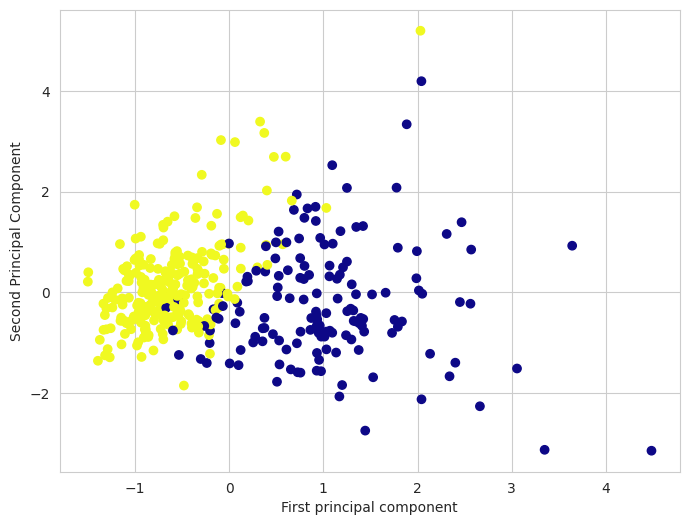

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Nyilvánvaló, hogy e két komponens használatával könnyen szétválaszthatjuk ezt a két osztályt.

## 4. 2. A komponensek értelmezése

Sajnos a dimenziócsökkentésnek ezzel a nagy erejével meg kell fizetni annak az árát, hogy könnyen megértsük, mit képviselnek ezek az összetevők.

A komponensek az eredeti jellemzők kombinációinak felelnek meg, maguk a komponensek az illesztett PCA objektum attribútumaként tárolódnak:

**Jegyzet:**

Principal Component Analysis - Főkomponens analízis:
* Feltáró adatelemzésben (exploratory data analysis - EDA) használják
* Vizualizálja a genetikai távolságot és a populációk közötti rokonságot.

* Módszer:
   * Adatkovariancia- (vagy korrelációs) mátrix sajátérték-felbontása
   * Egy adatmátrix szinguláris értékű dekompozíciója (átlagos központosítás / normalizálás után) az adatmátrix minden attribútumhoz.

* Kimenet
   * Komponens pontszámok, néha **faktor pontszámok** (a transzformált változó értékek)
   * **loadings** (súly)

* Adattömörítés és információk megőrzése
* Vizualizáció
* Zajszűrés
* Funkció kitermelés és tervezés

In [24]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 100, 'gamma': 1, 'kernel': 'poly'}
Train Result:
Accuracy Score: 96.48%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.978723    0.957198  0.964824    0.967961      0.965257
recall       0.926174    0.987952  0.964824    0.957063      0.964824
f1-score     0.951724    0.972332  0.964824    0.962028      0.964617
support    149.000000  249.000000  0.964824  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[138  11]
 [  3 246]]

Test Result:
Accuracy Score: 96.49%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.967213    0.963636  0.964912    0.965425      0.964954
recall      0.936508    0.981481  0.964912    0.958995      0.964912
f1-score    0.95161

# 5. Összegzés és feladatok

Ebben a notebookban felfedezhetted a Support Vector Machine Algorithm-et a gépi tanuláshoz. A következőkről tanultál:
- Mi az a support vector machine ?
- Support vector machine megvalósítást Pythonban.
- A Vector Machine kernelek támogatása (lineáris, polinomiális, radiális).
- Az adatok előkészítése a support vector machine algoritmushoz.
- Support vector machine  hiperparaméter hangolását.
- A Principal Compenent Analysis és annak használata a probléma összetettségének csökkentésére.
- Hogyan lehet kiszámítani a Principal Compenent Analysis több adatra a scikit-learn programban?

##Készítsd el a saját SVM és PCA kójaidat az alábbi lent emlitett adathalmazra:
####Elektromos járművek népességének adatai

Ez az adatkészlet az akkumulátoros elektromos járműveket (Battery Electric Vehicles - BEV) és a plug-in hibrid elektromos járműveket (Plug-in Hybrid Electric Vehicles - PHEV) mutatja, amelyeket jelenleg a Washingtoni Állami Engedélyezési Minisztérium (Department of Licensing - DOL) regisztrál.

A feladatok, amiket dokumentálj le és küld be(minnél részletesebb annál jobb):
*   Olvasd be az adatokat és mutasd meg a Pandas segítségével
*   A kernelek közzül végezd el az összest és dokumentáld le, a tapasztalataidat.(pld/ melyik teljesít jobban? stb...)
*   Végezz statisztikai méréseket, a print_score segítségével. Dokumentáld le, hogy mit csinál ez a függvény? Mi az hogy CM? Mit látunk vele? Hogyan lehet felhasználni a CM eredményeit?
